In [1]:
# Importing all necessary libraries to create prediction model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading csv file with DFW Airport snowfall data and setting DATE as index
dfw_data = '/Users/ali/Downloads/snowfall-dfw-airport.csv'
snow = pd.read_csv(dfw_data, index_col="DATE")

# Converting DATE index to datetime data type
snow.index = pd.to_datetime(snow.index)
print(snow.head())

                STATION                          NAME  SNOW  SNWD  TAVG
DATE                                                                   
2002-01-01  USW00003927  DAL FTW WSCMO AIRPORT, TX US   0.0   NaN  37.0
2002-01-02  USW00003927  DAL FTW WSCMO AIRPORT, TX US   0.0   NaN  28.0
2002-01-03  USW00003927  DAL FTW WSCMO AIRPORT, TX US   0.0   NaN  27.0
2002-01-04  USW00003927  DAL FTW WSCMO AIRPORT, TX US   0.0   NaN  38.0
2002-01-05  USW00003927  DAL FTW WSCMO AIRPORT, TX US   0.0   NaN  43.0


In [3]:
# Verifying the details of the dataset (data types, etc.)
print(snow.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7306 entries, 2002-01-01 to 2022-01-01
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  7306 non-null   object 
 1   NAME     7306 non-null   object 
 2   SNOW     7306 non-null   float64
 3   SNWD     5997 non-null   float64
 4   TAVG     4502 non-null   float64
dtypes: float64(3), object(2)
memory usage: 342.5+ KB
None


In [4]:
# Looking for null values by percent in each column
snow.apply(pd.isnull).sum() / snow.shape[0]

STATION    0.000000
NAME       0.000000
SNOW       0.000000
SNWD       0.179168
TAVG       0.383794
dtype: float64

In [5]:
# Checking for null values in Snow Depth (SNWD) and Temp Average (TAVG) columns
snow[pd.isnull(snow["SNWD"])]

,STATION,NAME,SNOW,SNWD,TAVG
DATE,,,,,
2002-01-01,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.0,NaN,37.0
2002-01-02,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.0,NaN,28.0
2002-01-03,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.0,NaN,27.0
2002-01-04,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.0,NaN,38.0
2002-01-05,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.0,NaN,43.0
...,...,...,...,...,...
2005-11-26,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.0,NaN,NaN
2005-11-27,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.0,NaN,NaN
2005-11-28,USW00003927,"DAL FTW WSCMO AIRPORT, TX US",0.0,NaN,NaN


In [6]:
# Replacing null values in Snow Depth column with 0
snow["SNWD"] = snow["SNWD"].fillna(0.0)

In [7]:
# Making sure we have no more null values in Snow Depth column
snow[pd.isnull(snow["SNWD"])]

,STATION,NAME,SNOW,SNWD,TAVG
DATE,,,,,


In [8]:
# Using Pandas "foward fill" feature take fill Temp Average with last non-null value
snow = snow.fillna(method="ffill")

In [9]:
# Making sure we have no more null values in Temp Average column
snow[pd.isnull(snow["TAVG"])]

,STATION,NAME,SNOW,SNWD,TAVG
DATE,,,,,


In [10]:
# Deleting non-numeric columns to keep the data clean
del snow["STATION"]
del snow["NAME"]

In [11]:
# Checking to see the updated number of rows in dataset
print(snow.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7306 entries, 2002-01-01 to 2022-01-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SNOW    7306 non-null   float64
 1   SNWD    7306 non-null   float64
 2   TAVG    7306 non-null   float64
dtypes: float64(3)
memory usage: 228.3 KB
None


<AxesSubplot:xlabel='DATE'>

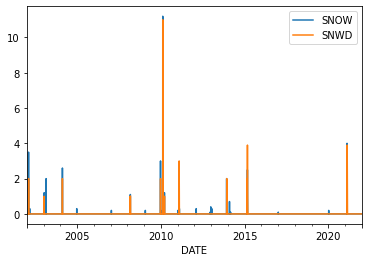

In [12]:
# Plotting the snow values with snow depth
snow[["SNOW", "SNWD"]].plot()

<AxesSubplot:xlabel='DATE'>

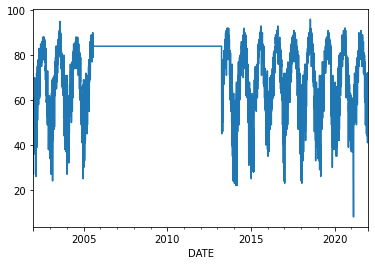

In [13]:
# Plotting the temp average values to see correlation with snowfall
snow["TAVG"].plot()

In [14]:
# Pulling the amount of snowfall by year
snow.groupby(snow.index.year).sum()["SNOW"]

DATE
2002     3.8
2003     3.2
2004     2.9
2005     0.0
2006     0.0
2007     0.3
2008     2.1
2009     3.4
2010    13.9
2011     4.3
2012     0.8
2013     2.4
2014     0.8
2015     5.8
2016     0.0
2017     0.1
2018     0.0
2019     0.0
2020     0.2
2021     5.0
2022     0.0
Name: SNOW, dtype: float64

In [15]:
# Adding a prediction column for snowfall, 1 day in the future
# Using the 'shift' function to move all data back by 1 row
snow["PREDICTION"] = snow.shift(-1)["SNOW"]

In [16]:
# Copying all rows expect last one with null value in "Prediction" column
snow = snow.iloc[:-1,:].copy()

In [17]:
snow.describe()

,SNOW,SNWD,TAVG,PREDICTION
count,7305.000000,7305.000000,7305.000000,7305.000000
mean,0.006708,0.009938,73.699658,0.006708
std,0.167610,0.196512,14.807791,0.167610
min,0.000000,0.000000,8.000000,0.000000
25%,0.000000,0.000000,64.000000,0.000000
50%,0.000000,0.000000,83.000000,0.000000
75%,0.000000,0.000000,84.000000,0.000000
max,11.200000,11.000000,96.000000,11.200000


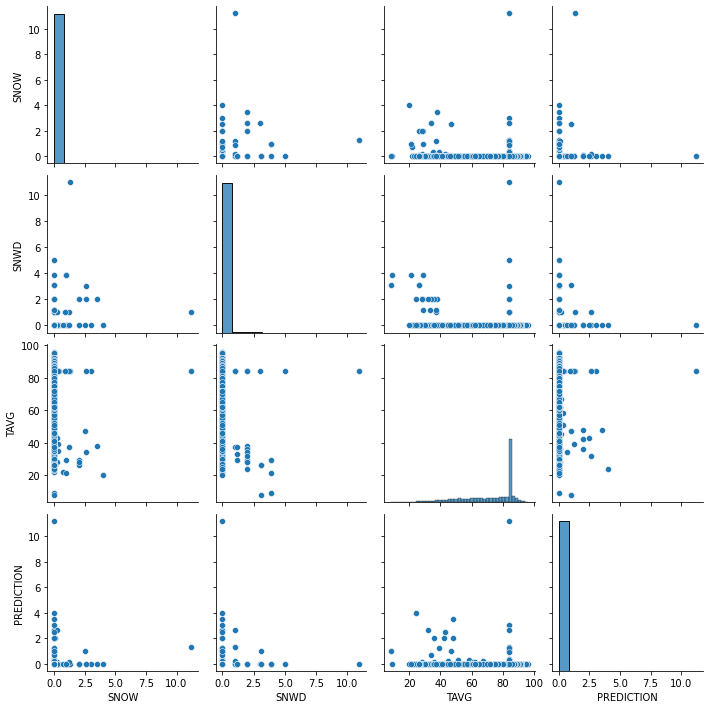

In [18]:
sns.pairplot(snow)

<AxesSubplot:xlabel='SNOW', ylabel='TAVG'>

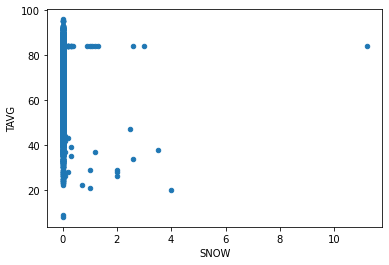

In [19]:
snow.plot(x='SNOW', y='TAVG', kind = 'scatter')

In [20]:
# Importing the Ridge regression library 
from sklearn.linear_model import Ridge

# Setting up the  L2 penalty for inputs that hinder the prediction
reg_model = Ridge(alpha=.1)

In [21]:
# Setting up the predictors for next day's weather
predictors = ["SNOW", "TAVG"]

In [22]:
# Setting up our train and test sets
train = snow.loc[:"2020-12-31"]
test = snow.loc["2021-01-01":]

In [23]:
reg_model.fit(train[predictors], train["PREDICTION"])

Ridge(alpha=0.1)

In [24]:
# Calculate predictions based on regression model with test set
predictions = reg_model.predict(test[predictors])

In [25]:
# Importing the mean_absolute_error library to evaluate predictions
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test["PREDICTION"], predictions)

0.02187426057605117

In [26]:
# Looking at the results based on actual snowfall vs predicted snowfall
results = pd.concat([test["PREDICTION"], pd.Series(predictions, index=test.index)], axis=1)
results.columns = ["ACTUAL", "PREDICTION"]
print(results)

            ACTUAL  PREDICTION
DATE                          
2021-01-01     0.0    0.013170
2021-01-02     0.0    0.012168
2021-01-03     0.0    0.011166
2021-01-04     0.0    0.010565
2021-01-05     0.0    0.010565
...            ...         ...
2021-12-27     0.0    0.006558
2021-12-28     0.0    0.006157
2021-12-29     0.0    0.007560
2021-12-30     0.0    0.008161
2021-12-31     0.0    0.008161

[365 rows x 2 columns]


<AxesSubplot:xlabel='DATE'>

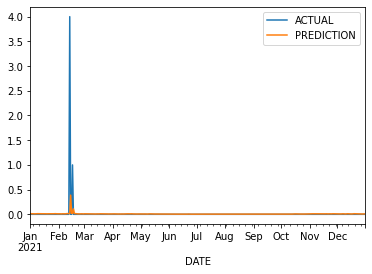

In [27]:
results.plot()

In [28]:
# Evaluating the difference between the actual snowfall vs predicted snowfall
results["DIFFERENCE"] = (results["ACTUAL"] - results["PREDICTION"]).abs()
results.sort_values("ACTUAL", ascending=False).head(25)

,ACTUAL,PREDICTION,DIFFERENCE
DATE,,,
2021-02-13,4.0,0.015774,3.984226
2021-02-16,1.0,0.018980,0.981020
2021-08-29,0.0,0.004154,0.004154
2021-09-07,0.0,0.004154,0.004154
2021-09-06,0.0,0.003753,0.003753
2021-09-05,0.0,0.003352,0.003352
2021-09-04,0.0,0.003152,0.003152
2021-09-03,0.0,0.003152,0.003152
2021-09-02,0.0,0.002951,0.002951
